# Nuages de mots

## Imports et stopwords

In [2]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/celineransart/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [16]:
# Choisir une année
year = 1928

In [17]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

100

In [18]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [19]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [20]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

'42- ANNEE. — N # 329. 16 PAGES - 30 O--. (En Btlglçuc et Allemagne occupe) A l’Etranger : 35 Centimes ABONNEMENTS •• •• #e Agglomération bruxelloise n„ • „ t Pour la province on Pronnce } ,^ onne à la'

In [21]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [22]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"42- ANNEE. — N # 329. 16 PAGES - 30 O--. (En Btlglçuc et Allemagne occupe) A l’Etranger : 35 Centimes ABONNEMENTS •• •• #e Agglomération bruxelloise n„ • „ t Pour la province on Pronnce } ,^ onne à laPo)le •• Congo bslge .. Par mon. 7.50 Trois mois 22'.00 Sis mois. 42.50 Un an . 82.50 Un an . 100.00 SAMEDI 24 NOVEMBRE 1928. Edit. 4 Editions * * * * à 14 b. 1S * * * à 17 L 30 * * à 18 h. 30 * Edit, de Narit Etranger • Prix suivant conventions postales ! Rédaction: 239.71 et 239.72 Administration "

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [23]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [24]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1928_clean.txt!'

In [25]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'ANNEE PAGES BTLGLÇUC ALLEMAGNE OCCUPE ETRANGER CENTIMES ABONNEMENTS AGGLOMÉRATION BRUXELLOISE PROVINCE PRONNCE ONNE LAPO CONGO BSLGE MOIS SIS MOIS SAMEDI NOVEMBRE EDIT EDITIONS EDIT NARIT ETRANGER PRIX SUIVANT CONVENTIONS POSTALES RÉDACTION ADMINISTRATION ANNONCES IMPRIMERIE RÉDACTION PLACE LOUVAIN ADMINISTRATION PLACE LOUVAIN ANNONCES AGENCE ROAAEL ROYALE CHAQUE JOUR PAGES SALLE DÉPÊCHES RUE ROYALE BRUXELLES BUREAUX FILA SPÉCIAUX PARIS PLACE BOURSE LONDRES FIEET STREET COMPTE PHÈQUE POSTAUX PAR'

## Nuage de mots

### Afficher les termes les plus fréquents


In [26]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('RUE', 3943), ('BRUXELLES', 1841), ('PRIX', 1237), ('MAISON', 1076), ('HEURES', 836), ('DEMANDE', 831), ('TRÈS', 761), ('AGENCE', 693), ('ANS', 676), ('GRAND', 648)]


### Créer, stocker et afficher le nuage de mots

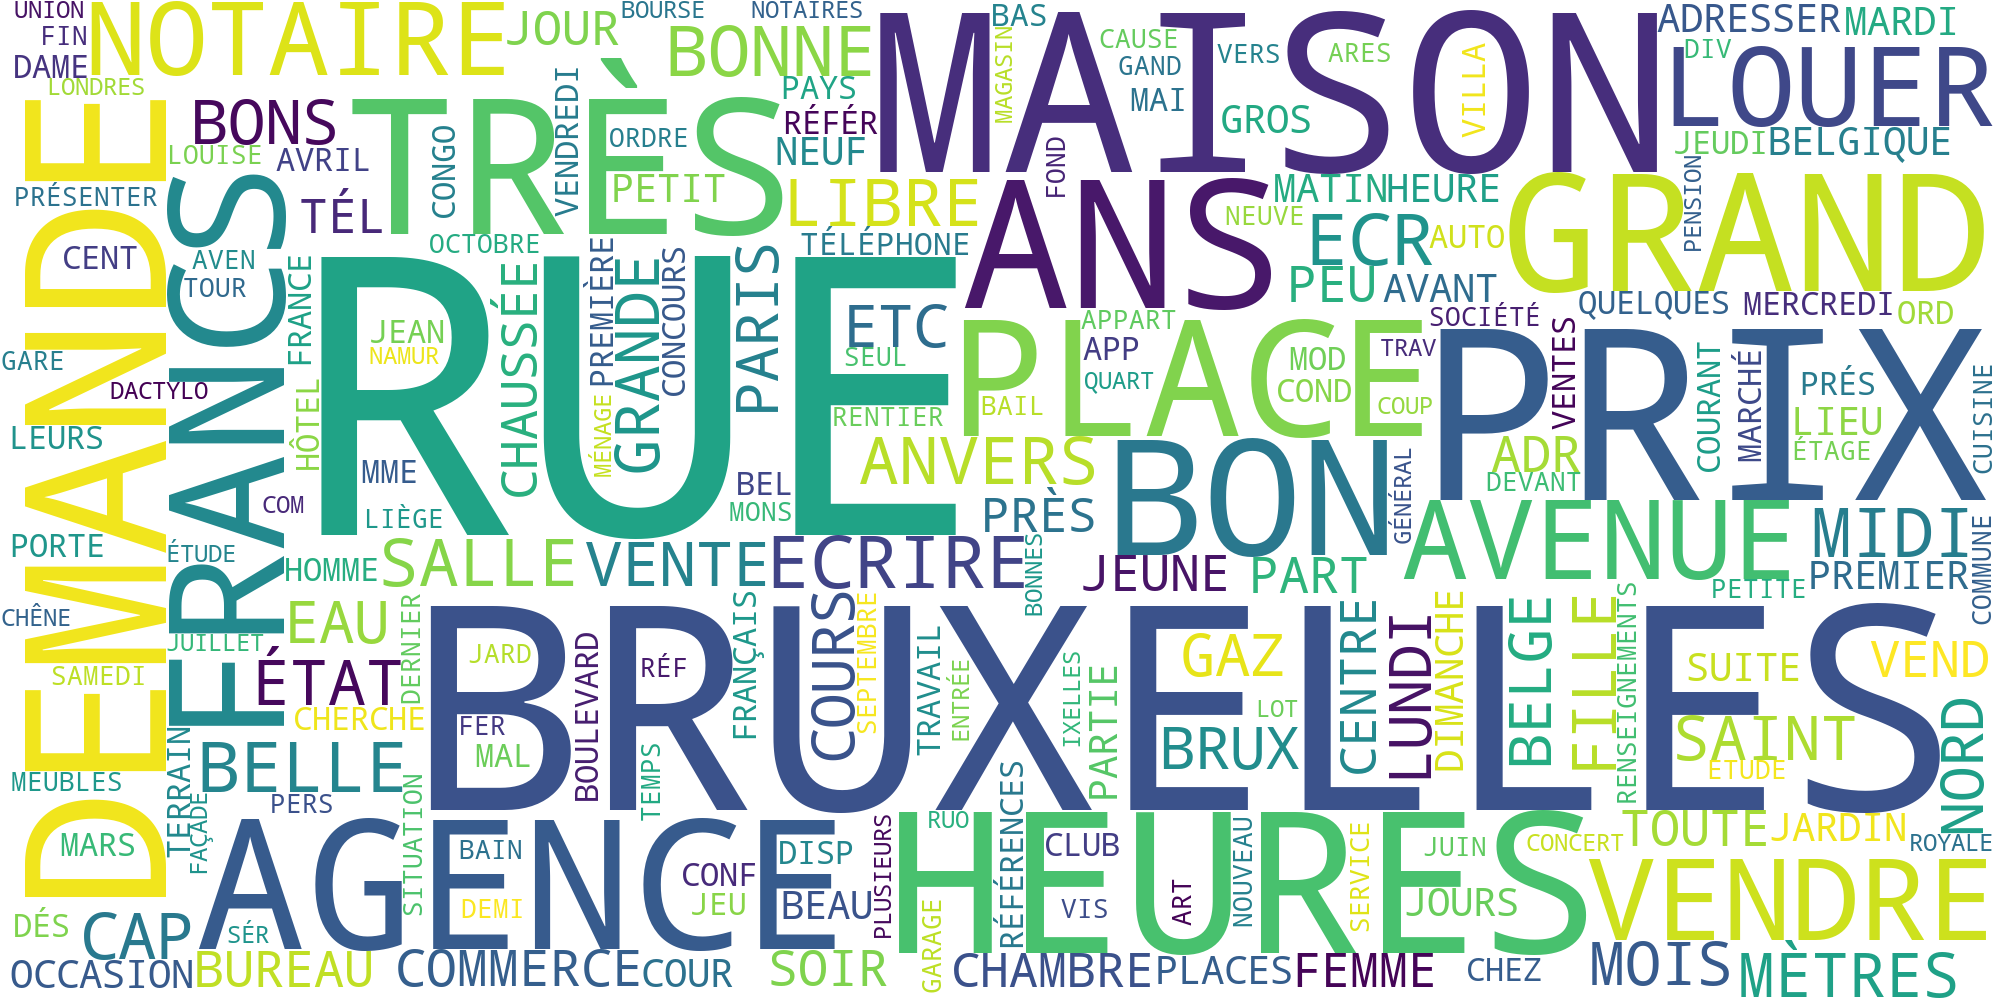

In [27]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))